Automatically created module for IPython interactive environment
[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.68s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.56s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.57s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.25s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.26s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.25s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.52s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.34s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.34s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.09, time = 0.30s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -20.08, time = 0.27s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -19.82, time = 0.50s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -19.64, time = 0.25s
[BernoulliRBM] Iteration 14, pseud

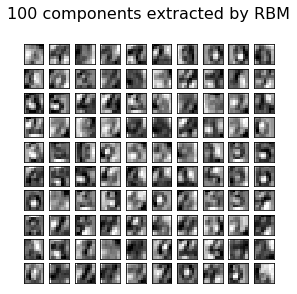

In [1]:
from __future__ import print_function

print(__doc__)

# Authors: Yann N. Dauphin, Vlad Niculae, Gabriel Synnaeve
# License: BSD

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline


# #############################################################################
# Setting up

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant',
                                  weights=w).ravel()
    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

# Load Data
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
X, Y = nudge_dataset(X, digits.target)
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=0)

# Models we will use
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)

# #############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

# #############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [2]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
model = BernoulliRBM(n_components=2)
model.fit(X)



BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=2, n_iter=10,
       random_state=None, verbose=0)

# RBM
$$max \sum_{i = 0}^{n_v} logp(v^i)$$